<a href="https://colab.research.google.com/github/ArtNellas/Colabs/blob/main/Copy_of_PokePredict_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to the world of Pokemon!

##Preliminaries

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, naive_bayes, ensemble, tree, svm, model_selection, preprocessing, feature_extraction, metrics, base, pipeline
from joblib import dump, load
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import PIL
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML FINAL PROJECT/Pokemon.csv")
display(df)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


##Graphs

<Axes: ylabel='Type 1'>

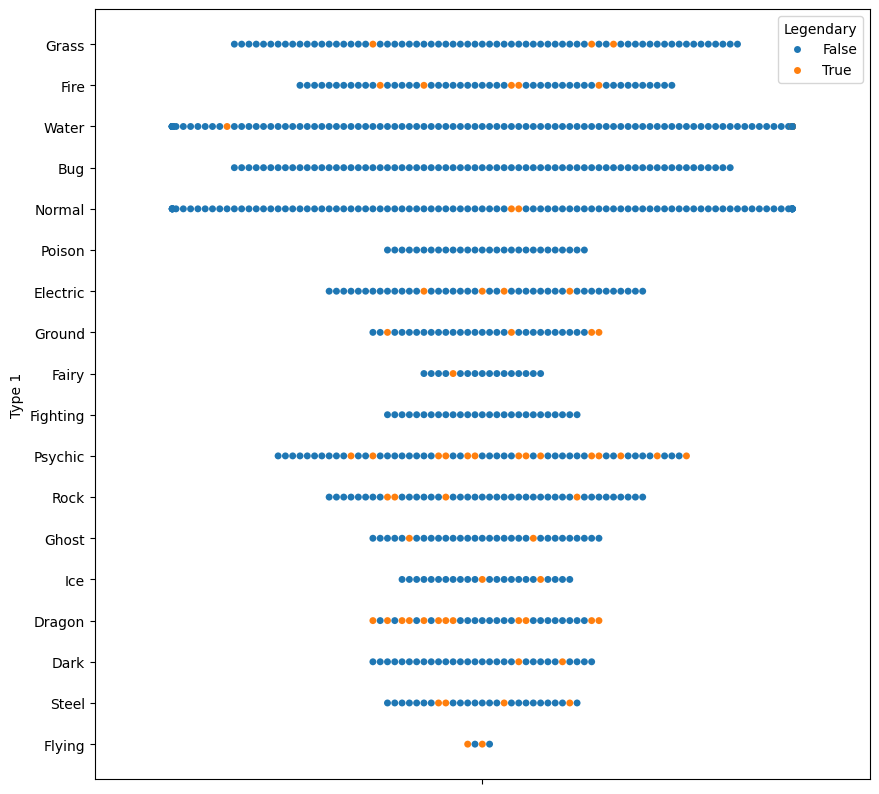

In [ ]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=df, y='Type 1', hue='Legendary')

<Axes: xlabel='#', ylabel='Total'>

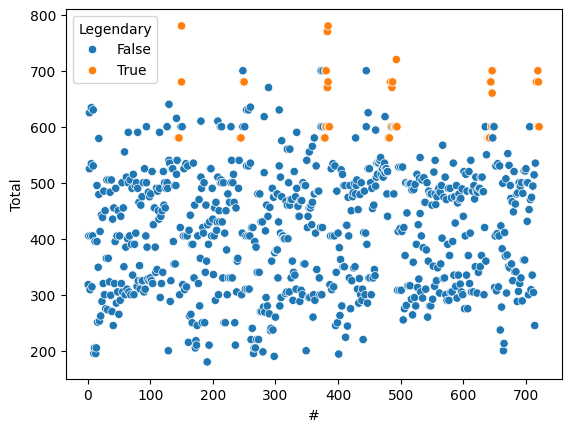

In [ ]:
sns.scatterplot(data=df, x='#', y='Total', hue='Legendary')

<Axes: xlabel='Generation', ylabel='Count'>

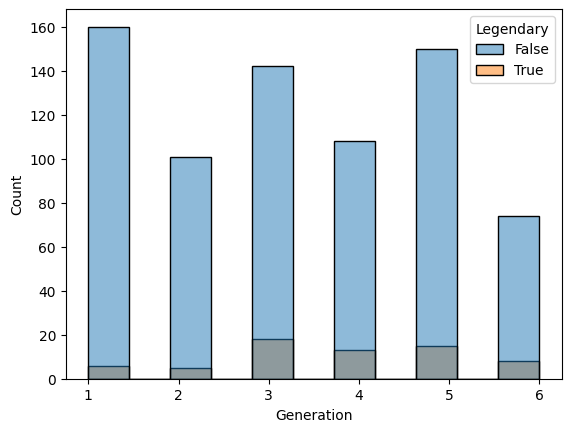

In [ ]:
sns.histplot(data=df, x='Generation', hue='Legendary')

##Cleaning and Modifying the Dataset

In [ ]:
df.isna().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


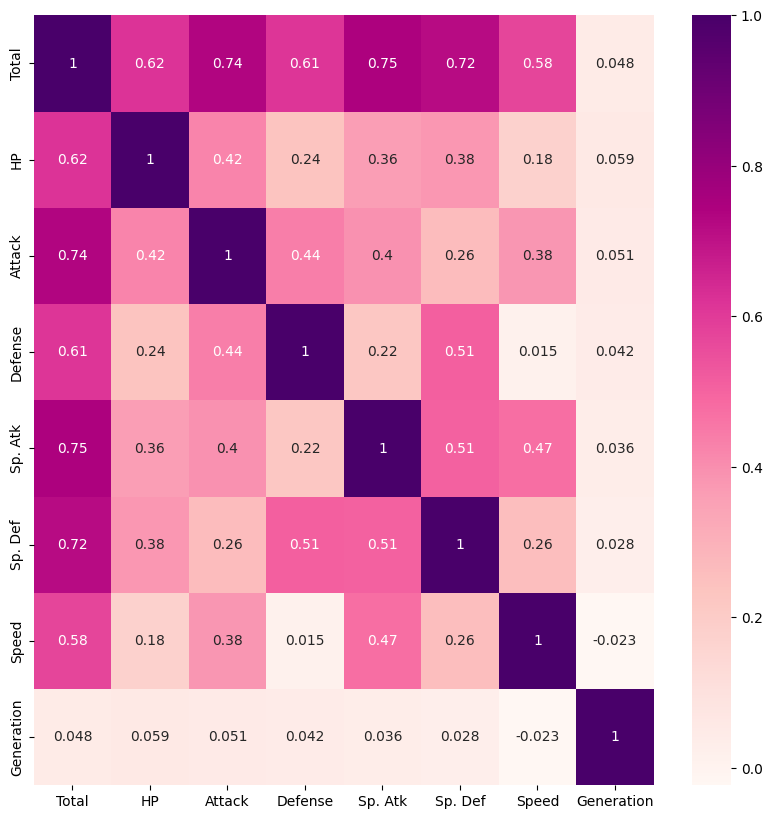

In [ ]:
corr_matrix = df[['Total', 'HP',	'Attack',	'Defense',	'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True, cmap ='RdPu')
plt.show()

In [ ]:
df['Type'] = df['Type 1'] + ';' +  df['Type 2'].fillna('Null')

In [ ]:
df.drop(['Type 1', 'Type 2', 'Generation', 'Name', '#', 'Total' ], axis = 1, inplace = True)

In [ ]:
df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Type
0,45,49,49,65,65,45,False,Grass;Poison
1,60,62,63,80,80,60,False,Grass;Poison
2,80,82,83,100,100,80,False,Grass;Poison
3,80,100,123,122,120,80,False,Grass;Poison
4,39,52,43,60,50,65,False,Fire;Null
...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,True,Rock;Fairy
796,50,160,110,160,110,110,True,Rock;Fairy
797,80,110,60,150,130,70,True,Psychic;Ghost
798,80,160,60,170,130,80,True,Psychic;Dark


In [ ]:
df.isna().sum()

,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0
Legendary,0
Type,0


In [ ]:
df['Legendary'] = df['Legendary'].map({True:1, False:0})

In [ ]:
display(df)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Type
0,45,49,49,65,65,45,0,Grass;Poison
1,60,62,63,80,80,60,0,Grass;Poison
2,80,82,83,100,100,80,0,Grass;Poison
3,80,100,123,122,120,80,0,Grass;Poison
4,39,52,43,60,50,65,0,Fire;Null
...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,1,Rock;Fairy
796,50,160,110,160,110,110,1,Rock;Fairy
797,80,110,60,150,130,70,1,Psychic;Ghost
798,80,160,60,170,130,80,1,Psychic;Dark


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
text_vectorized = vectorizer.fit_transform(df['Type'])


text_df = pd.DataFrame(text_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
text_df.reset_index(drop=True, inplace=True)

df = pd.concat([df.drop(columns=['Type']).reset_index(drop=True), text_df], axis=1)
print(df)

     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary  bug      dark  \
0    45      49       49       65       65     45          0  0.0  0.000000   
1    60      62       63       80       80     60          0  0.0  0.000000   
2    80      82       83      100      100     80          0  0.0  0.000000   
3    80     100      123      122      120     80          0  0.0  0.000000   
4    39      52       43       60       50     65          0  0.0  0.000000   
..   ..     ...      ...      ...      ...    ...        ...  ...       ...   
795  50     100      150      100      150     50          1  0.0  0.000000   
796  50     160      110      160      110    110          1  0.0  0.000000   
797  80     110       60      150      130     70          1  0.0  0.000000   
798  80     160       60      170      130     80          1  0.0  0.761881   
799  80     110      120      130       90     70          1  0.0  0.000000   

     dragon  ...     grass  ground  ice  normal  nu

In [ ]:
display(df)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,bug,dark,dragon,...,grass,ground,ice,normal,null,poison,psychic,rock,steel,water
0,45,49,49,65,65,45,0,0.0,0.000000,0.0,...,0.661095,0.0,0.0,0.0,0.0,0.750302,0.000000,0.000000,0.0,0.0
1,60,62,63,80,80,60,0,0.0,0.000000,0.0,...,0.661095,0.0,0.0,0.0,0.0,0.750302,0.000000,0.000000,0.0,0.0
2,80,82,83,100,100,80,0,0.0,0.000000,0.0,...,0.661095,0.0,0.0,0.0,0.0,0.750302,0.000000,0.000000,0.0,0.0
3,80,100,123,122,120,80,0,0.0,0.000000,0.0,...,0.661095,0.0,0.0,0.0,0.0,0.750302,0.000000,0.000000,0.0,0.0
4,39,52,43,60,50,65,0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,1,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.672382,0.0,0.0
796,50,160,110,160,110,110,1,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.672382,0.0,0.0
797,80,110,60,150,130,70,1,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.637641,0.000000,0.0,0.0
798,80,160,60,170,130,80,1,0.0,0.761881,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.647717,0.000000,0.0,0.0


##Preparing the Dataset

In [ ]:
X = df.drop('Legendary', axis=1)
y = df['Legendary']
print(X.shape, y.shape)

(800, 24) (800,)


In [ ]:
kfold = KFold(n_splits = 7, shuffle = True, random_state = 42)

In [ ]:
#RANDOM FOREST

best_score = 0
best_modelRF = None

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestClassifier(n_estimators = 100, random_state = 20)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_score:
        best_score = accuracy
        best_modelRF = model

print(f"Best Accuracy: {best_score:.3f}")
print(f'Best Model: {best_modelRF}')

Best Accuracy: 0.974
Best Model: RandomForestClassifier(random_state=20)


##User Input

In [ ]:
def predict_user_features(user_inputs, best_modelKNN):
    # Vectorize the 'Type' column
    text_vectorized = vectorizer.transform(user_inputs[['Type']])

    text_df = pd.DataFrame(text_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
    text_df.reset_index(drop=True, inplace=True)

    input_data = pd.concat([user_inputs.drop(columns=['Type']).reset_index(drop=True), text_df], axis=1)

    prediction = best_modelRF.predict(input_data)
    return "Not Legendary" if prediction[0] == 0 else "Legendary"

In [ ]:
user_inputs = pd.DataFrame(columns=['Type','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'])

for feature in user_inputs.columns:
    while True: # loop until valid input
        value = input(f"Enter value for {feature}: ")
        try:
            # try converting to numeric. if successful, break loop
            if feature != 'Type':
                value = int(value)  # Convert to integer if not 'Type'
            break
        except ValueError:
            print("Invalid input. Please enter a valid number for numerical features")

    user_inputs.loc[0, feature] = value

print(f"Prediction: {predict_user_features(user_inputs, best_modelRF)}")
print(f"Base State Total (BST): {sum(user_inputs.loc[0, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']].astype(int))}") # convert to int before summing

Enter value for Type: Grass;Poison
Enter value for HP: 45
Enter value for Attack: 49
Enter value for Defense: 49
Enter value for Sp. Atk: 65
Enter value for Sp. Def: 65
Enter value for Speed: 45
Prediction: Not Legendary
Base State Total (BST): 318


'\nuser_inputs = pd.DataFrame(columns=[\'Type\',\'HP\', \'Attack\', \'Defense\', \'Sp. Atk\', \'Sp. Def\',\'Speed\'])\n\nfor feature in user_inputs.columns:\n    value = input(f"Enter value for {feature}: ")\n    user_inputs.loc[0, feature] = value\n\nprint(f"Prediction: {predict_user_features(user_inputs, best_modelKNN)}")\nprint(f"Base State Total (BST): {sum(user_inputs.loc[0, [\'HP\', \'Attack\', \'Defense\', \'Sp. Atk\', \'Sp. Def\',\'Speed\']])}")\n'

In [ ]:
user_inputs

,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Grass;Poison,45,49,49,65,65,45


##Pokemon of Interest

###Real Pokemon

In [ ]:
#ARCEUS

user_inputs = pd.DataFrame(columns=['Type','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'])

for feature in user_inputs.columns:
    while True: # loop until valid input
        value = input(f"Enter value for {feature}: ")
        try:
            # try converting to numeric. if successful, break loop
            if feature != 'Type':
                value = int(value)  # Convert to integer if not 'Type'
            break
        except ValueError:
            print("Invalid input. Please enter a valid number for numerical features")

    user_inputs.loc[0, feature] = value

print(f"Prediction: {predict_user_features(user_inputs, best_modelRF)}")
print(f"Base State Total (BST): {sum(user_inputs.loc[0, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']].astype(int))}") # convert to int before summing

Enter value for Type: Normal;Null
Enter value for HP: 120
Enter value for Attack: 120
Enter value for Defense: 120
Enter value for Sp. Atk: 120
Enter value for Sp. Def: 120
Enter value for Speed: 120
Prediction: Legendary
Base State Total (BST): 720


In [ ]:
#SHUCKLE

user_inputs = pd.DataFrame(columns=['Type','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'])

for feature in user_inputs.columns:
    while True: # loop until valid input
        value = input(f"Enter value for {feature}: ")
        try:
            # try converting to numeric. if successful, break loop
            if feature != 'Type':
                value = int(value)  # Convert to integer if not 'Type'
            break
        except ValueError:
            print("Invalid input. Please enter a valid number for numerical features")

    user_inputs.loc[0, feature] = value

print(f"Prediction: {predict_user_features(user_inputs, best_modelRF)}")
print(f"Base State Total (BST): {sum(user_inputs.loc[0, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']].astype(int))}") # convert to int before summing

Enter value for Type: Rock;Bug
Enter value for HP: 20
Enter value for Attack: 10
Enter value for Defense: 230
Enter value for Sp. Atk: 10
Enter value for Sp. Def: 230
Enter value for Speed: 5
Prediction: Not Legendary
Base State Total (BST): 505


In [ ]:
#VOLCANION

user_inputs = pd.DataFrame(columns=['Type','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'])

for feature in user_inputs.columns:
    while True: # loop until valid input
        value = input(f"Enter value for {feature}: ")
        try:
            # try converting to numeric. if successful, break loop
            if feature != 'Type':
                value = int(value)  # Convert to integer if not 'Type'
            break
        except ValueError:
            print("Invalid input. Please enter a valid number for numerical features")

    user_inputs.loc[0, feature] = value

print(f"Prediction: {predict_user_features(user_inputs, best_modelRF)}")
print(f"Base State Total (BST): {sum(user_inputs.loc[0, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']].astype(int))}") # convert to int before summing

Enter value for Type: Fire;Water
Enter value for HP: 80
Enter value for Attack: 110
Enter value for Defense: 120
Enter value for Sp. Atk: 130
Enter value for Sp. Def: 90
Enter value for Speed: 70
Prediction: Not Legendary
Base State Total (BST): 600


In [ ]:
#GARCHOMP

user_inputs = pd.DataFrame(columns=['Type','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'])

for feature in user_inputs.columns:
    while True: # loop until valid input
        value = input(f"Enter value for {feature}: ")
        try:
            # try converting to numeric. if successful, break loop
            if feature != 'Type':
                value = int(value)  # Convert to integer if not 'Type'
            break
        except ValueError:
            print("Invalid input. Please enter a valid number for numerical features")

    user_inputs.loc[0, feature] = value

print(f"Prediction: {predict_user_features(user_inputs, best_modelRF)}")
print(f"Base State Total (BST): {sum(user_inputs.loc[0, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']].astype(int))}") # convert to int before summing

Enter value for Type: Ground;Dragon
Enter value for HP: 108
Enter value for Attack: 130
Enter value for Defense: 95
Enter value for Sp. Atk: 80
Enter value for Sp. Def: 85
Enter value for Speed: 102
Prediction: Not Legendary
Base State Total (BST): 600


In [ ]:
#MEW

user_inputs = pd.DataFrame(columns=['Type','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'])

for feature in user_inputs.columns:
    while True: # loop until valid input
        value = input(f"Enter value for {feature}: ")
        try:
            # try converting to numeric. if successful, break loop
            if feature != 'Type':
                value = int(value)  # Convert to integer if not 'Type'
            break
        except ValueError:
            print("Invalid input. Please enter a valid number for numerical features")

    user_inputs.loc[0, feature] = value

print(f"Prediction: {predict_user_features(user_inputs, best_modelRF)}")
print(f"Base State Total (BST): {sum(user_inputs.loc[0, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']].astype(int))}") # convert to int before summing

Enter value for Type: Psychic;Null
Enter value for HP: 100
Enter value for Attack: 100
Enter value for Defense: 100
Enter value for Sp. Atk: 100
Enter value for Sp. Def: 100
Enter value for Speed: 100
Prediction: Not Legendary
Base State Total (BST): 600


###New Pokemon

In [ ]:
#ETERNAMAX-ETERNATUS

user_inputs = pd.DataFrame(columns=['Type','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'])

for feature in user_inputs.columns:
    while True: # loop until valid input
        value = input(f"Enter value for {feature}: ")
        try:
            # try converting to numeric. if successful, break loop
            if feature != 'Type':
                value = int(value)  # Convert to integer if not 'Type'
            break
        except ValueError:
            print("Invalid input. Please enter a valid number for numerical features")

    user_inputs.loc[0, feature] = value

print(f"Prediction: {predict_user_features(user_inputs, best_modelRF)}")
print(f"Base State Total (BST): {sum(user_inputs.loc[0, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']].astype(int))}") # convert to int before summing

Enter value for Type: Poison;Dragon
Enter value for HP: 255
Enter value for Attack: 115
Enter value for Defense: 250
Enter value for Sp. Atk: 125
Enter value for Sp. Def: 250
Enter value for Speed: 130
Prediction: Legendary
Base State Total (BST): 1125


In [ ]:
#DECIDUEYE

user_inputs = pd.DataFrame(columns=['Type','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'])

for feature in user_inputs.columns:
    while True: # loop until valid input
        value = input(f"Enter value for {feature}: ")
        try:
            # try converting to numeric. if successful, break loop
            if feature != 'Type':
                value = int(value)  # Convert to integer if not 'Type'
            break
        except ValueError:
            print("Invalid input. Please enter a valid number for numerical features")

    user_inputs.loc[0, feature] = value

print(f"Prediction: {predict_user_features(user_inputs, best_modelRF)}")
print(f"Base State Total (BST): {sum(user_inputs.loc[0, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']].astype(int))}") # convert to int before summing

Enter value for Type: Grass;Ghost
Enter value for HP: 78
Enter value for Attack: 107
Enter value for Defense: 75
Enter value for Sp. Atk: 100
Enter value for Sp. Def: 100
Enter value for Speed: 70
Prediction: Not Legendary
Base State Total (BST): 530


In [ ]:
#KOMMO-O

user_inputs = pd.DataFrame(columns=['Type','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'])

for feature in user_inputs.columns:
    while True: # loop until valid input
        value = input(f"Enter va1lue for {feature}: ")
        try:
            # try converting to numeric. if successful, break loop
            if feature != 'Type':
                value = int(value)  # Convert to integer if not 'Type'
            break
        except ValueError:
            print("Invalid input. Please enter a valid number for numerical features")

    user_inputs.loc[0, feature] = value

print(f"Prediction: {predict_user_features(user_inputs, best_modelRF)}")
print(f"Base State Total (BST): {sum(user_inputs.loc[0, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']].astype(int))}") # convert to int before summing

Enter va1lue for Type: Dragon;Fighting
Enter va1lue for HP: 75
Enter va1lue for Attack: 110
Enter va1lue for Defense: 125
Enter va1lue for Sp. Atk: 100
Enter va1lue for Sp. Def: 105
Enter va1lue for Speed: 85
Prediction: Not Legendary
Base State Total (BST): 600


###What if

In [ ]:
#RANDOM TYPE W/ MID STATS

user_inputs = pd.DataFrame(columns=['Type','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'])

for feature in user_inputs.columns:
    while True: # loop until valid input
        value = input(f"Enter va1lue for {feature}: ")
        try:
            # try converting to numeric. if successful, break loop
            if feature != 'Type':
                value = int(value)  # Convert to integer if not 'Type'
            break
        except ValueError:
            print("Invalid input. Please enter a valid number for numerical features")

    user_inputs.loc[0, feature] = value

print(f"Prediction: {predict_user_features(user_inputs, best_modelRF)}")
print(f"Base State Total (BST): {sum(user_inputs.loc[0, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']].astype(int))}") # convert to int before summing

Enter va1lue for Type: laskjbfskld;bruh
Enter va1lue for HP: 100
Enter va1lue for Attack: 95
Enter va1lue for Defense: 120
Enter va1lue for Sp. Atk: 100
Enter va1lue for Sp. Def: 80
Enter va1lue for Speed: 70
Prediction: Not Legendary
Base State Total (BST): 565


In [ ]:
#RANDOM TYPE W/ HIGH STATS

user_inputs = pd.DataFrame(columns=['Type','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'])

for feature in user_inputs.columns:
    while True: # loop until valid input
        value = input(f"Enter va1lue for {feature}: ")
        try:
            # try converting to numeric. if successful, break loop
            if feature != 'Type':
                value = int(value)  # Convert to integer if not 'Type'
            break
        except ValueError:
            print("Invalid input. Please enter a valid number for numerical features")

    user_inputs.loc[0, feature] = value

print(f"Prediction: {predict_user_features(user_inputs, best_modelRF)}")
print(f"Base State Total (BST): {sum(user_inputs.loc[0, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']].astype(int))}") # convert to int before summing

Enter va1lue for Type: laskjdlaskjd;akjsdbjasbdjbdskibidi
Enter va1lue for HP: 130
Enter va1lue for Attack: 130
Enter va1lue for Defense: 130
Enter va1lue for Sp. Atk: 130
Enter va1lue for Sp. Def: 130
Enter va1lue for Speed: 130
Prediction: Legendary
Base State Total (BST): 780


##Other Model Comparisons

In [ ]:
#NAIVE BAYES

best_score = 0
best_modelNB = None

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = naive_bayes.MultinomialNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_score:
        best_score = accuracy
        best_modelNB = model

print(f"Best Accuracy: {best_score:.3f}")
print(f'Best Model: {best_modelNB}')

Best Accuracy: 0.825
Best Model: MultinomialNB()


In [ ]:
#KNN

best_score = 0
best_modelKNN = None

# KNN model training
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_score:
        best_score = accuracy
        best_modelKNN = model

print(f"Best Accuracy: {best_score:.3f}")
print(f'Best Model: {best_modelKNN}')

Best Accuracy: 0.965
Best Model: KNeighborsClassifier()
